In [2]:
import sklearn
print("scikit-learn version:", sklearn.__version__)

scikit-learn version: 1.3.0


# Data Loading and Preprocessing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [2]:
data = pd.read_csv('Annex.csv')

In [3]:
data.head()

,family,proc_pid,file,urls,type,name,ext_urls,path,program,info,positives,families,description,sign_name,sign_stacktrace,arguments,api,category,imported_dll_count,dll,pe_res_name,filetype,pe_sec_name,entropy,hosts,requests,mitm,domains,dns_servers,tcp,udp,dead_hosts,proc,beh_command_line,process_path,tree_command_line,children,tree_process_name,command_line,regkey_read,directory_enumerated,regkey_opened,file_created,wmi_query,dll_loaded,regkey_written,file_read,apistats,errors,action,log
0,E,0,0,0,0,0,0,0,0,0,1,0,8,8,0,0,0,0,1,6,1,1,6,6,20,19,0,18,2,35,28,0,3,3,3,3,0,3,0,11,5,0,0,0,0,0,0,38,0,1,4073
1,G,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,3,1,1,3,3,3,4,0,4,1,2,14,0,2,2,2,2,0,2,0,1,0,0,0,0,0,0,0,7,0,1,19
2,E,1,1,0,0,0,0,0,0,0,1,0,3,3,0,1,1,1,1,6,2,2,4,4,14,14,0,13,2,26,22,0,2,2,2,2,0,2,0,0,0,0,0,0,0,0,0,8,0,1,17
3,L,0,0,0,0,0,0,0,0,0,1,0,10,10,0,5,5,5,1,3,0,0,5,5,21,18,0,17,2,38,29,1,1,1,1,1,0,1,1,66,0,0,1,0,7,0,0,28,0,1,18
4,G,0,0,0,0,0,0,0,0,0,1,0,6,6,0,2,2,2,1,6,31,31,3,3,5,6,0,5,1,4,23,0,2,2,2,2,0,2,0,11,0,27,0,0,6,0,0,33,0,1,18


In [4]:
data.isnull().sum()

family                  0
proc_pid                0
file                    0
urls                    0
type                    0
name                    0
ext_urls                0
path                    0
program                 0
info                    0
positives               0
families                0
description             0
sign_name               0
sign_stacktrace         0
arguments               0
api                     0
category                0
imported_dll_count      0
dll                     0
pe_res_name             0
filetype                0
pe_sec_name             0
entropy                 0
hosts                   0
requests                0
mitm                    0
domains                 0
dns_servers             0
tcp                     0
udp                     0
dead_hosts              0
proc                    0
beh_command_line        0
process_path            0
tree_command_line       0
children                0
tree_process_name       0
command_line

In [5]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
30      False
31      False
32      False
33      False
34      False
35      False
36      False
37      False
38      False
39      False
40      False
41      False
42      False
43      False
44      False
45      False
46      False
47      False
48      False
49      False
50      False
51      False
52      False
53      False
54      False
55      False
56      False
57      False
58      False
59      False
60      False
61      False
62      False
63      False
64      False
65      False
66      False
67      False
68      False
69      False
70      False
71    

In [6]:
data.drop_duplicates(inplace = True)

In [7]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
30      False
31      False
32      False
33      False
34      False
35      False
36      False
37      False
38      False
39      False
40      False
41      False
42      False
43      False
44      False
45      False
46      False
47      False
48      False
49      False
50      False
51      False
52      False
53      False
54      False
55      False
56      False
57      False
58      False
59      False
60      False
61      False
62      False
63      False
64      False
65      False
66      False
67      False
68      False
69      False
70      False
71    

In [8]:
data.shape

(1750, 51)

In [9]:
data.dtypes

family                  object
proc_pid                 int64
file                     int64
urls                     int64
type                     int64
name                     int64
ext_urls                 int64
path                     int64
program                  int64
info                     int64
positives                int64
families                 int64
description              int64
sign_name                int64
sign_stacktrace          int64
arguments                int64
api                      int64
category                 int64
imported_dll_count       int64
dll                      int64
pe_res_name              int64
filetype                 int64
pe_sec_name              int64
entropy                  int64
hosts                    int64
requests                 int64
mitm                     int64
domains                  int64
dns_servers              int64
tcp                      int64
udp                      int64
dead_hosts               int64
proc    

In [10]:
data['family'].value_counts()

G    820
E    767
L    163
Name: family, dtype: int64

E - Encryptor: Ransomware classified as "E" refers to encryptor ransomware. Encryptor ransomware is the most common type of ransomware, where the malware encrypts the victim's files and demands a ransom for the decryption key.

G - Goodware: Ransomware classified as "G" might refer to goodware, which means legitimate or non-malicious software. It's possible that this label indicates a false positive or misclassification of non-malicious software as ransomware.

L - Locker: Ransomware classified as "L" indicates locker ransomware. Locker ransomware denies access to the victim's system or key functionalities, often without encrypting files.

One Hot Encoding the family column

In [11]:
#mapping the family class
# Create a dictionary to map codes to labels
family_mapping = {
    'G': 0,
    'E': 1,
    'L': 2
}

# Apply the mapping to the "family" column
data['family'] = data['family'].map(family_mapping)


In [12]:
data.head()
data.to_csv('data3.csv')

In [13]:
data.describe()

,family,proc_pid,file,urls,type,name,ext_urls,path,program,info,positives,families,description,sign_name,sign_stacktrace,arguments,api,category,imported_dll_count,dll,pe_res_name,filetype,pe_sec_name,entropy,hosts,requests,mitm,domains,dns_servers,tcp,udp,dead_hosts,proc,beh_command_line,process_path,tree_command_line,children,tree_process_name,command_line,regkey_read,directory_enumerated,regkey_opened,file_created,wmi_query,dll_loaded,regkey_written,file_read,apistats,errors,action,log
count,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,1750.0,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,1750.0,1750.000000,1750.000000,1750.000000,1750.0,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,1750.0,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000
mean,0.624571,0.552571,0.552571,5.937714,0.298857,0.298857,0.0,0.298857,0.098857,0.098857,0.954857,0.147429,12.632000,12.632000,0.0,42.818857,42.818857,42.818857,1.0,9.157143,9.903429,9.903429,5.055429,5.055429,43.151429,11.197714,0.0,10.505143,1.444000,22.230857,77.506286,0.470857,2.690286,2.690286,2.690286,1.624000,0.606857,1.624000,1.138286,401.033143,125.707429,74.193714,180.037714,0.070286,15.353714,2.552571,380.277714,77.993143,0.004571,0.812000,714.445714
std,0.648851,1.512793,1.512793,37.064500,0.915122,0.915122,0.0,0.915122,0.404306,0.404306,0.207677,0.354634,9.653251,9.653251,0.0,71.884721,71.884721,71.884721,0.0,12.262187,11.404529,11.404529,1.503117,1.503117,181.538783,7.604413,0.0,7.297150,0.515074,23.683383,334.776108,1.047749,3.267923,3.267923,3.267923,0.984323,1.826293,0.984323,2.664865,919.768978,360.316129,190.453246,638.174212,0.300899,22.779175,8.248522,1144.486538,129.564000,0.067477,0.390824,1922.324283
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.0,0.000000,0.000000,0.000000,1.0,1.000000,0.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,6.000000,6.000000,0.0,0.000000,0.000000,0.000000,1.0,4.000000,1.000000,1.000000,4.000000,4.000000,5.000000,4.000000,0.0,4.000000,1.000000,4.000000,15.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,1.000000,17.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,9.000000,9.000000,0.0,3.000000,3.000000,3.000000,1.0,7.000000,5.000000,5.000000,5.000000,5.000000,9.000000,8.000000,0.0,7.000000,1.000000,10.000000,24.000000,0.000000,2.000000,2.000000,2.000000,2.000000,0.000000,2.000000,0.000000,14.000000,0.000000,1.000000,0.000000,0.000000,4.000000,0.000000,0.000000,30.000000,0.000000,1.000000,22.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,18.000000,0.0,57.000000,57.000000,57.000000,1.0,10.000000,11.000000,11.000000,6.000000,6.000000,21.000000,18.000000,0.0,17.000000,2.000000,38.000000,30.000000,1.000000,3.000000,3.000000,3.000000,2.000000,1.000000,2.000000,1.000000,121.000000,24.750000,27.000000,10.000000,0.000000,24.000000,2.000000,15.000000,86.000000,0.000000,1.000000,111.500000
max,2.000000,20.000000,20.000000,392.000000,6.000000,6.000000,0.0,6.000000,4.000000,4.000000,1.000000,1.000000,52.000000,52.000000,0.0,411.000000,411.000000,411.000000,

In [20]:
data.columns

Index(['family', 'proc_pid', 'file', 'urls', 'type', 'name', 'ext_urls',
       'path', 'program', 'info', 'positives', 'families', 'description',
       'sign_name', 'sign_stacktrace', 'arguments', 'api', 'category',
       'imported_dll_count', 'dll', 'pe_res_name', 'filetype', 'pe_sec_name',
       'entropy', 'hosts', 'requests', 'mitm', 'domains', 'dns_servers', 'tcp',
       'udp', 'dead_hosts', 'proc', 'beh_command_line', 'process_path',
       'tree_command_line', 'children', 'tree_process_name', 'command_line',
       'regkey_read', 'directory_enumerated', 'regkey_opened', 'file_created',
       'wmi_query', 'dll_loaded', 'regkey_written', 'file_read', 'apistats',
       'errors', 'action', 'log'],
      dtype='object')

# Modeling

**Logistic Regression**

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Separate features and target variable
X = data.drop('family', axis=1)
y = data['family']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:\n', classification_rep)


Accuracy: 0.89
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.92      0.91       171
           1       0.87      0.90      0.89       146
           2       0.92      0.67      0.77        33

    accuracy                           0.89       350
   macro avg       0.90      0.83      0.86       350
weighted avg       0.89      0.89      0.89       350



Accuracy: This is the overall accuracy of the classifier, which is the ratio of correctly predicted instances to the total number of instances in the test set. In this case, the accuracy is 0.89, meaning that the classifier correctly predicted the class labels for 89% of the instances in the test set.

Precision: Precision is the ratio of true positive predictions to the total number of instances predicted as positive for a particular class. It measures the accuracy of positive predictions. For example, for class 0, the precision is 0.90, meaning that out of all instances predicted as class 0, 90% were actually class 0.

Recall (Sensitivity): Recall is the ratio of true positive predictions to the total number of instances that are actually of a particular class. It measures the ability of the classifier to correctly identify instances of a given class. For class 0, the recall is 0.92, indicating that 92% of the actual class 0 instances were correctly predicted.

F1-Score: The F1-score is the harmonic mean of precision and recall, providing a balance between the two metrics. It is useful when there is an imbalance between classes. A higher F1-score indicates better overall performance. For class 0, the F1-score is 0.91.

Support: Support refers to the number of instances in each class in the test set.

Macro Avg: This is the average of precision, recall, and F1-score across all classes. It treats all classes equally regardless of class imbalance.

Weighted Avg: This is the weighted average of precision, recall, and F1-score, where the weights are the number of instances in each class. This metric is useful when there is class imbalance.

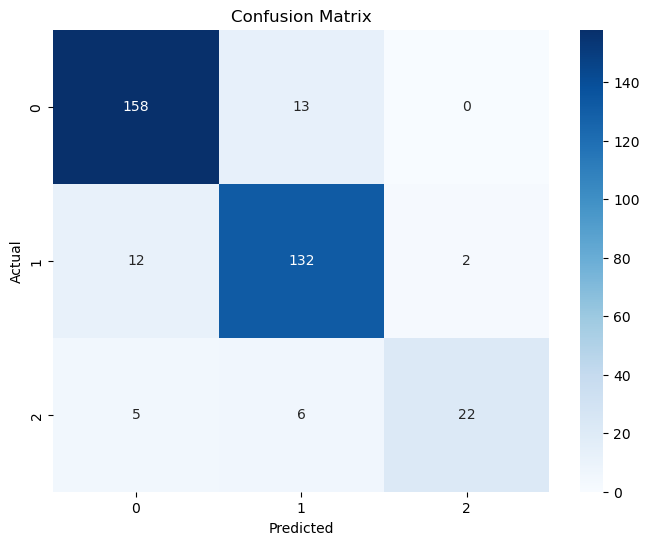

In [15]:
# Create a confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**Random Forest Classifier**

Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       171
           1       1.00      1.00      1.00       146
           2       1.00      1.00      1.00        33

    accuracy                           1.00       350
   macro avg       1.00      1.00      1.00       350
weighted avg       1.00      1.00      1.00       350



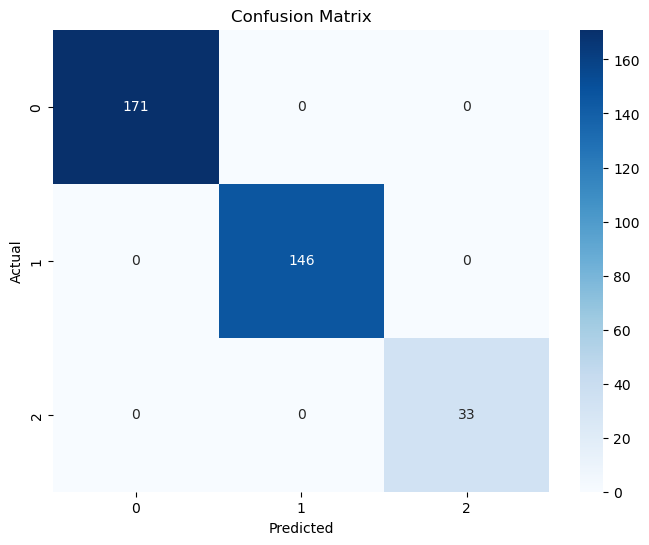

In [16]:
from sklearn.ensemble import RandomForestClassifier
# Separate features and target variable
X = data.drop('family', axis=1)
y = data['family']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:\n', classification_rep)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Accuracy: An accuracy of 1.00 means that the model predicted all instances correctly. It indicates that the model's predictions matched the actual class labels perfectly.

Precision, Recall, and F1-Score: For all classes (0, 1, and 2), the precision, recall, and F1-score are all 1.00. This indicates that the model achieved perfect precision (no false positives), perfect recall (no false negatives), and a perfect F1-score (harmonic mean of precision and recall) for each class. In other words, the model's predictions for each class were entirely accurate.

Support: The "support" column indicates the number of instances in each class in the test set.

Macro Avg: The macro average of precision, recall, and F1-score is also 1.00, indicating that the model's performance is perfect when treating all classes equally.

Weighted Avg: The weighted average of precision, recall, and F1-score is also 1.00, considering the class distribution. This suggests that the model's performance is excellent even when accounting for class imbalance.

**Support Vector Machine**

Confusion Matrix:
 [[164   7   0]
 [  6 140   0]
 [  0   1  32]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       171
           1       0.95      0.96      0.95       146
           2       1.00      0.97      0.98        33

    accuracy                           0.96       350
   macro avg       0.97      0.96      0.97       350
weighted avg       0.96      0.96      0.96       350



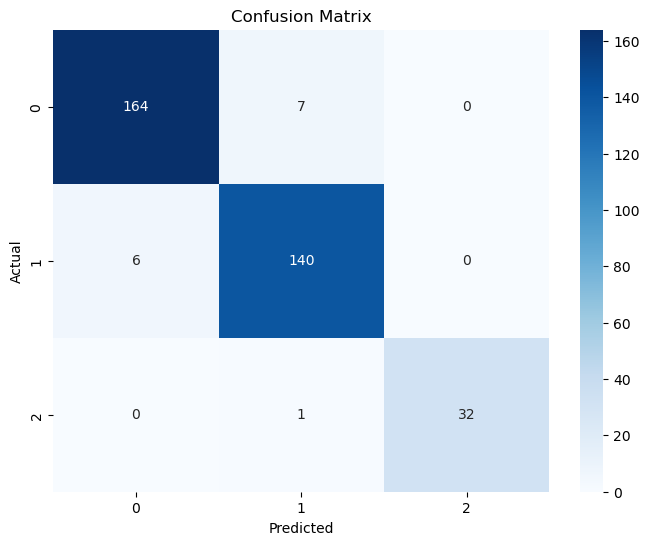

In [17]:
from sklearn.svm import SVC

# Separate features and target variable
X = data.drop('family', axis=1)
y = data['family']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the SVM classifier
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = svm_classifier.predict(X_test)

# Print confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Accuracy: An accuracy of 0.96 means that the model correctly predicted 96% of the instances in the test set.

Precision, Recall, and F1-Score: The precision values indicate the proportion of correctly predicted instances among those predicted as a specific class. The recall values indicate the proportion of correctly predicted instances among all instances of a specific class. The F1-score is the harmonic mean of precision and recall, providing a balance between the two metrics.

For class 0, the precision is 0.96, which means that 96% of instances predicted as class 0 were correctly predicted. The recall is 0.96, indicating that 96% of the actual class 0 instances were correctly predicted. The F1-score is 0.96, providing a balance between precision and recall.

For class 1, the precision is 0.95, indicating that 95% of instances predicted as class 1 were correctly predicted. The recall is 0.96, indicating that 96% of the actual class 1 instances were correctly predicted. The F1-score is 0.95.

For class 2, both precision and recall are 1.00, suggesting that all instances predicted as class 2 were correct, and 97% of the actual class 2 instances were correctly predicted. The F1-score is 0.98.

Support: The "support" column indicates the number of instances in each class in the test set.

Macro Avg: The macro average of precision, recall, and F1-score is 0.97, indicating that the overall performance across all classes is good.

Weighted Avg: The weighted average of precision, recall, and F1-score is 0.96, considering the class distribution. This suggests that the model's performance is excellent even when accounting for class imbalance.

**Summary**

From the model performances, it clearly shows that the Random Forest classifier had the best performance with a 100% accuracy on the test
dataset.

In [18]:
import pickle

In [19]:
filename= 'malware_predictor.sav'
pickle.dump(model,open(filename,'wb'))